In [1]:
import train_logger as train_logger
import matplotlib.pyplot as plt

%load_ext autoreload

In [32]:
logger_baseline = train_logger.TrainingLogger("../baseline_model.db")
logger = train_logger.TrainingLogger("../gan_sampler.db")


Connecting to existing database at ../baseline_model.db
Connecting to existing database at ../gan_sampler.db


In [33]:
for id in logger_baseline.get_experiment_ids():
    print(id, logger_baseline.get_experiment_name(id))


1 ITGAN
2 Real
3 Random
4 GAN_Inversion


In [12]:
for id in logger.get_experiment_ids():
    print(id, logger.get_experiment_name(id))

1 Gen
2 Our
3 Real
4 Gen+Real
5 Our+Gen
6 Our+Real
7 Realx2


In [10]:
for exp in logger.get_experiment_ids():
    results = logger.get_results(exp)
    print(f"Experiment {exp}: {logger.get_experiment_name(exp)}")
    print(f"run_id | epoch| train_loss| train_acc| test_loss| test_acc")
    for run_id, epoch, train_loss, train_acc, test_loss, test_acc in results:
        print(f"{run_id:7d}| {epoch:5d}| {train_loss:10.2f}| {train_acc:9.2f}| {test_loss:9.2f}| {test_acc:8.2f}")

Experiment 1: Gen
run_id | epoch| train_loss| train_acc| test_loss| test_acc
      1|     0|       1.32|      0.52|      1.32|     0.55
      1|     1|       0.87|      0.69|      0.90|     0.69
      2|     0|       1.34|      0.51|      1.13|     0.60
      2|     1|       0.88|      0.69|      0.90|     0.67
      3|     0|       1.35|      0.51|      1.31|     0.55
      3|     1|       0.89|      0.68|      1.01|     0.64
      4|     0|       1.31|      0.52|      1.25|     0.55
      4|     1|       0.86|      0.69|      1.20|     0.61
      5|     0|       1.34|      0.51|      1.12|     0.60
      5|     1|       0.89|      0.68|      1.15|     0.62
      6|     0|       1.35|      0.51|      1.23|     0.56
      6|     1|       0.90|      0.68|      0.94|     0.67
      7|     0|       1.33|      0.52|      1.25|     0.55
      7|     1|       0.88|      0.69|      1.28|     0.59
      8|     0|       1.33|      0.51|      1.30|     0.56
      8|     1|       0.87|      0.69|

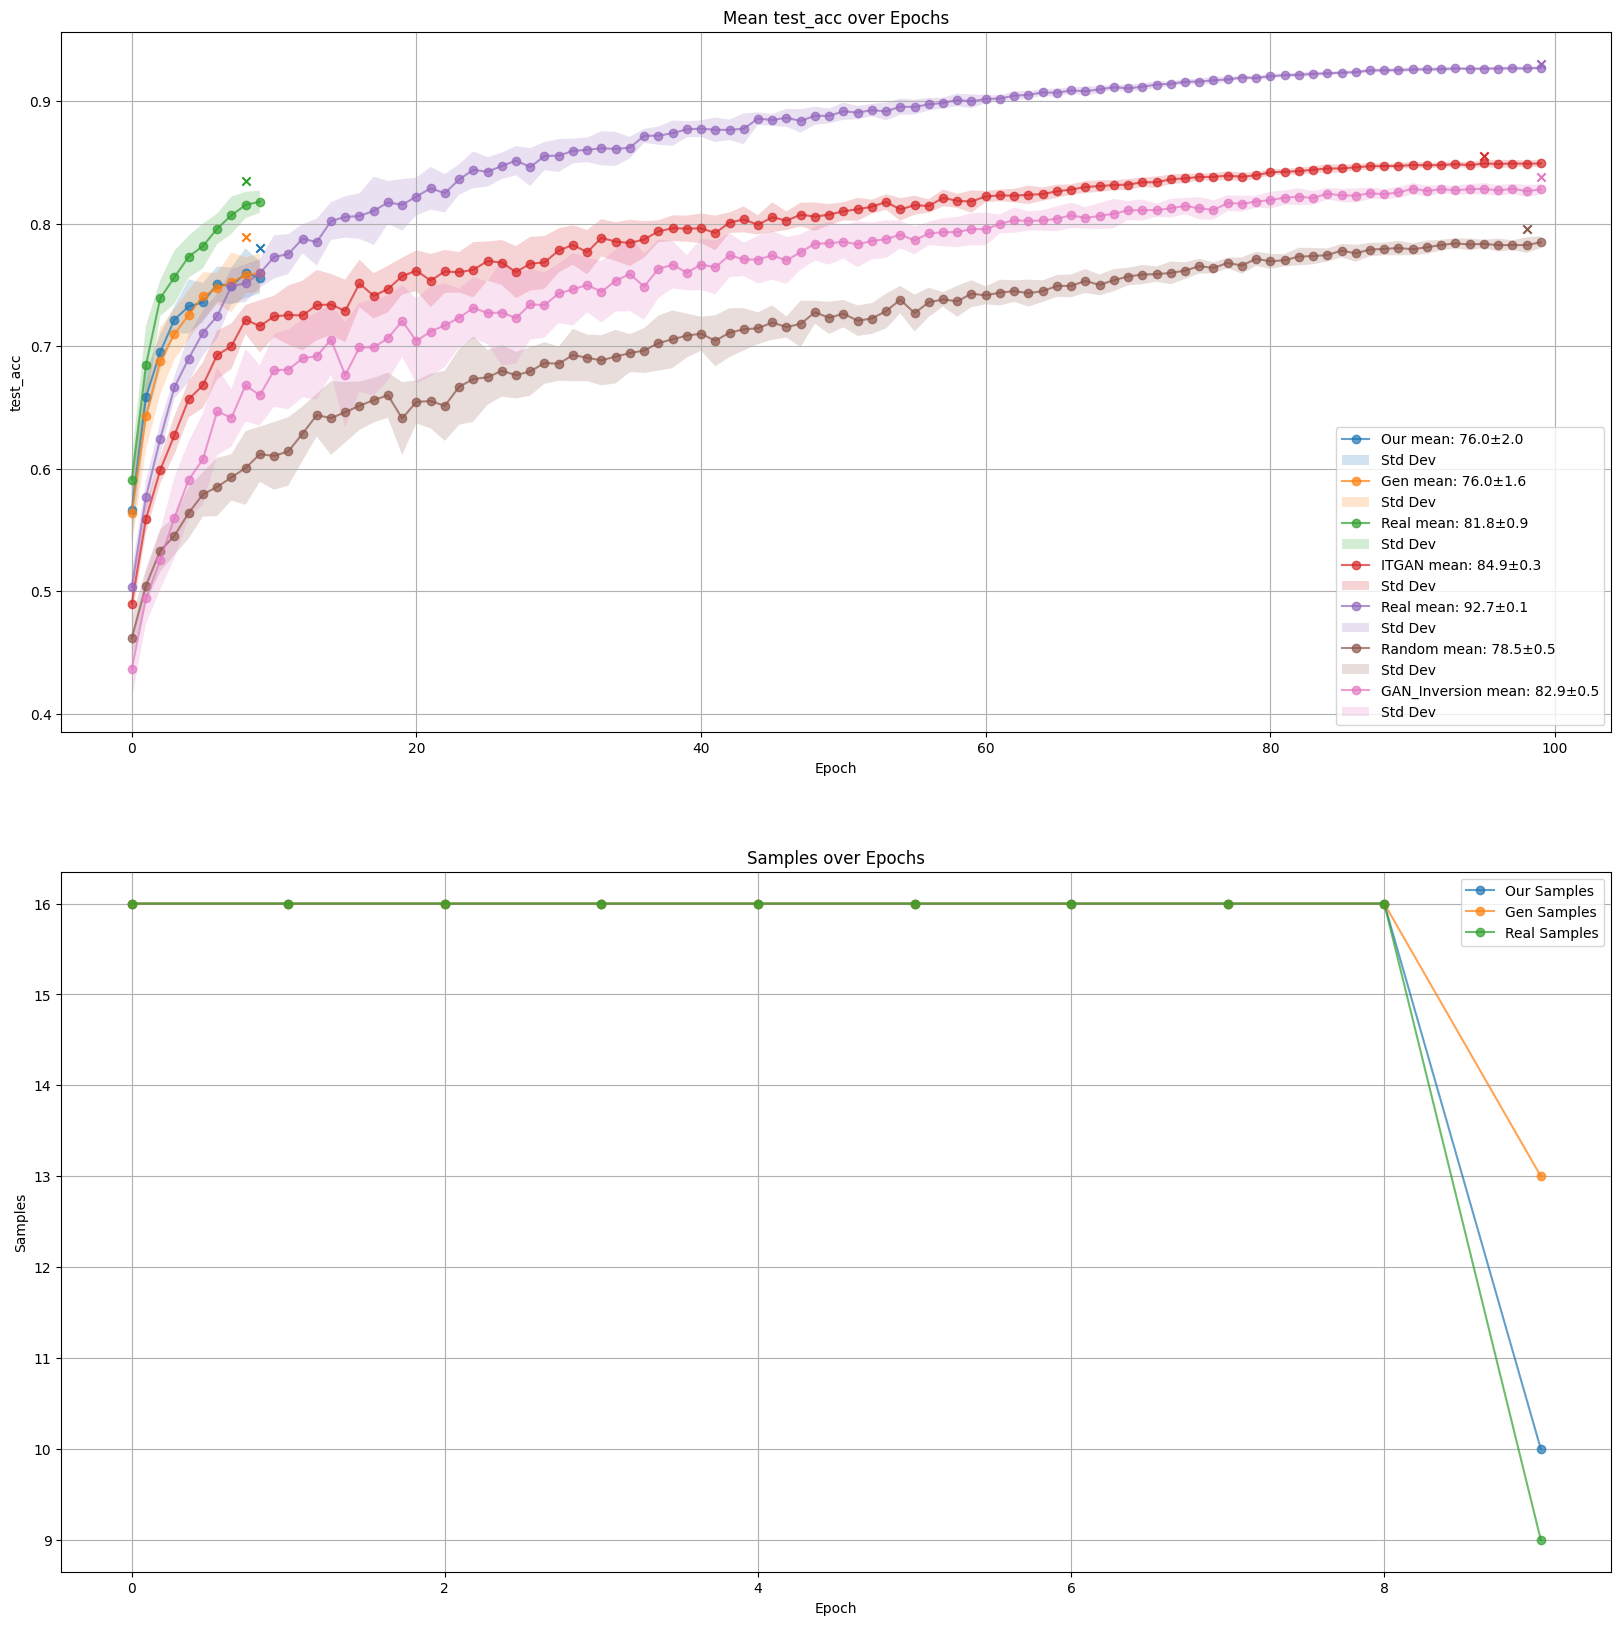

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
results1 = train_logger.plot_metric(logger, 2, 1,3, metric='test_acc', ax=ax[0])
train_logger.plot_metric(logger_baseline, 1, 2,3, 4, metric='test_acc', ax=ax[0])
train_logger.plot_samples(logger, 2, 1,3, metric='test_acc', ax=ax[1])

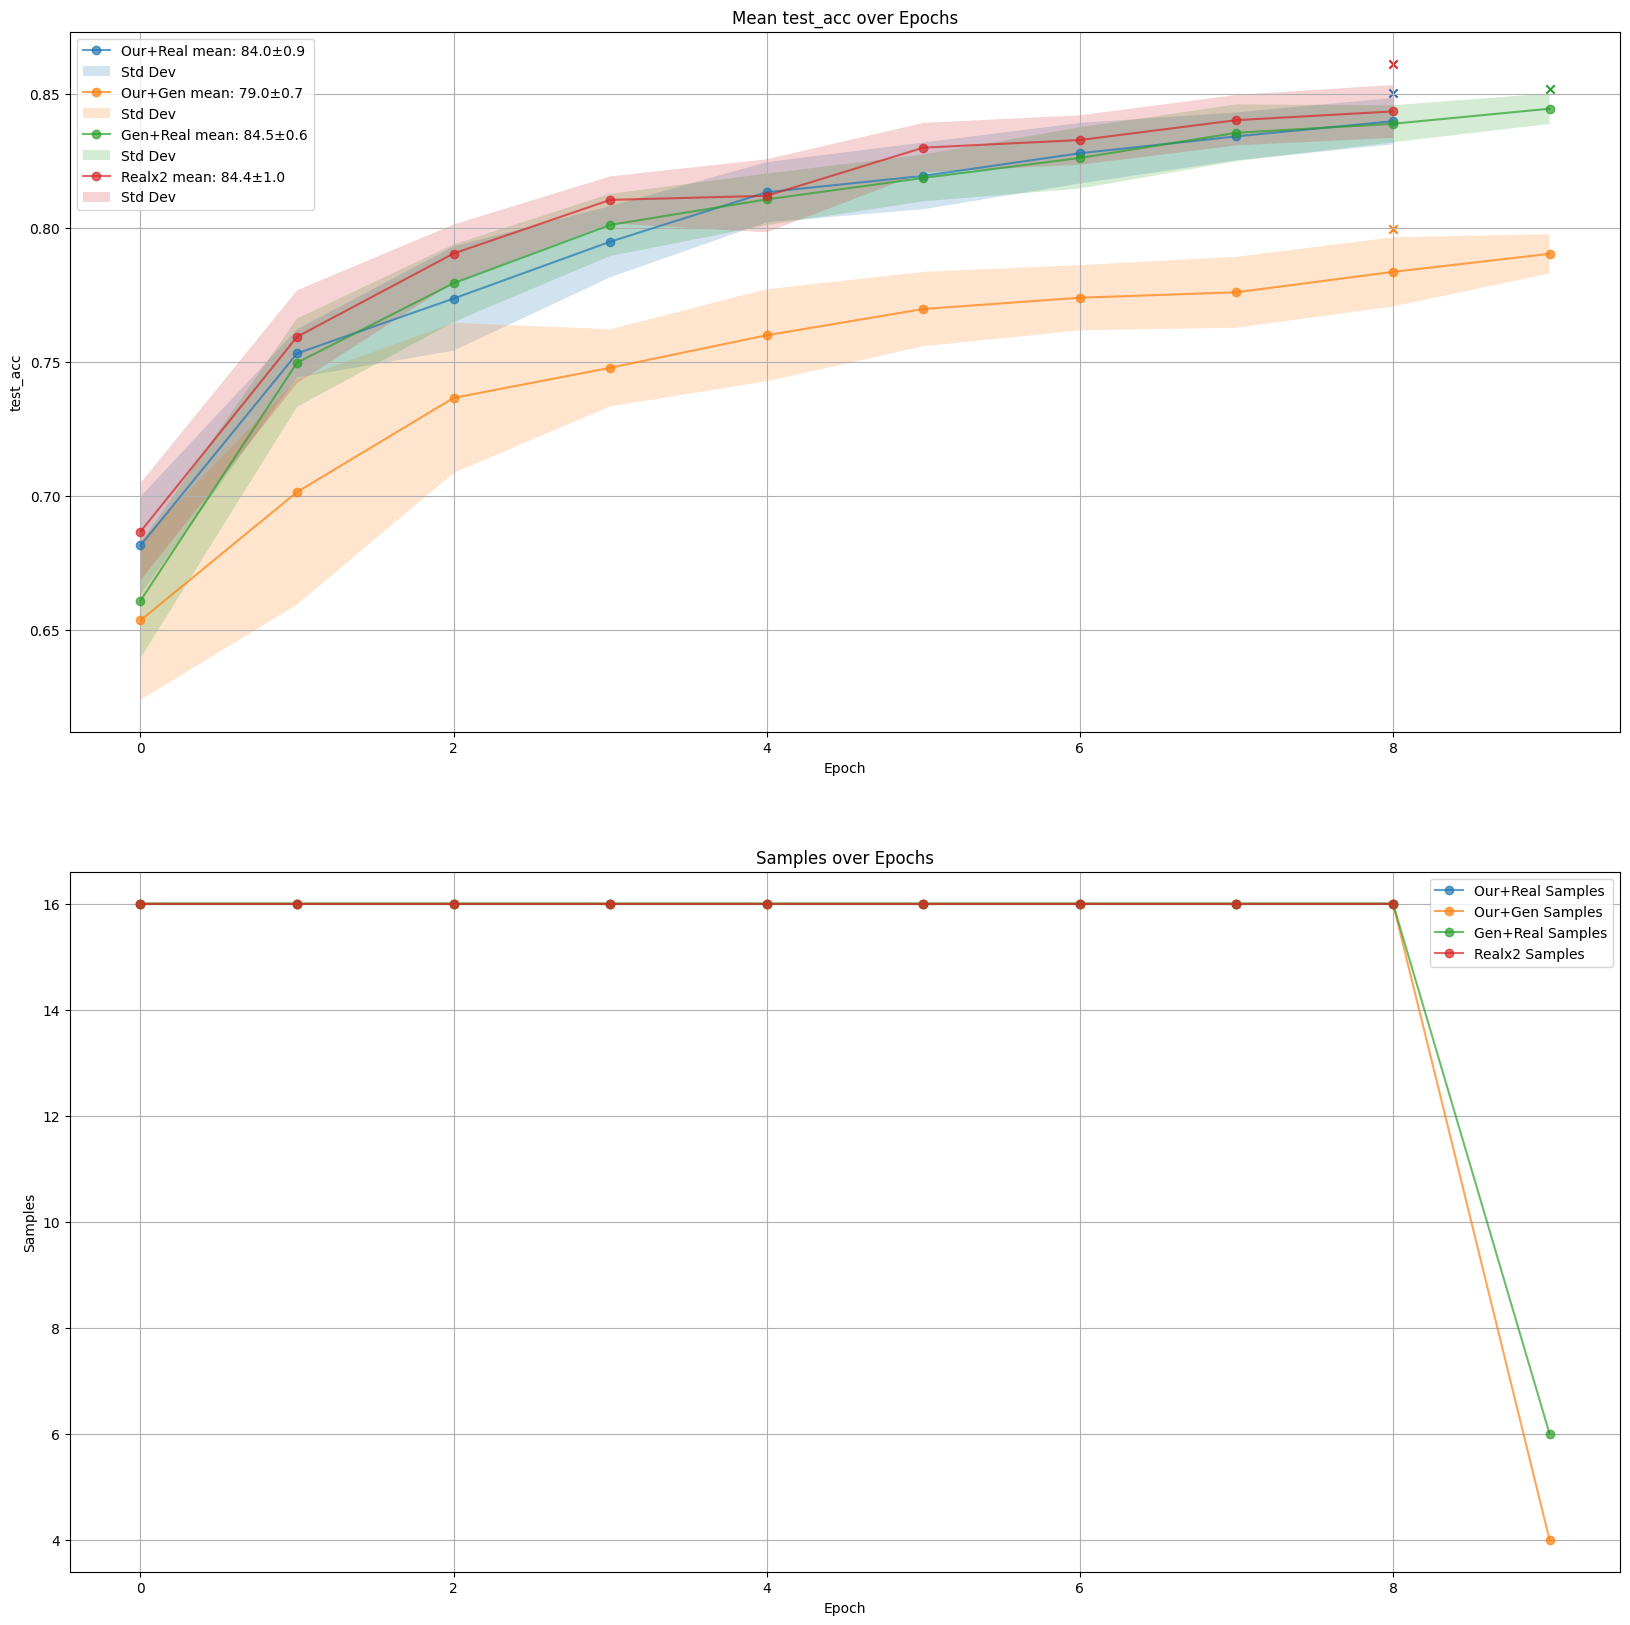

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
results2 = train_logger.plot_metric(logger, 6, 5, 4,7, metric='test_acc', ax=ax[0])
train_logger.plot_samples(logger, 6, 5,4,7, metric='test_acc', ax=ax[1])

In [40]:
for (name, mean , std,*_) in results1:
    print(f"{name}: {mean:.2f} +- {std:.2f}")
for (name, mean , std,*_) in results2: 
    print(f"{name}: {mean:.2f} +- {std:.2f}")


Real: 0.80 +- 0.01
Our: 0.75 +- 0.01
Gen: 0.75 +- 0.01
Realx2: 0.83 +- 0.01
Our+Real: 0.83 +- 0.01
Gen+Real: 0.83 +- 0.01
Our+Gen: 0.77 +- 0.01


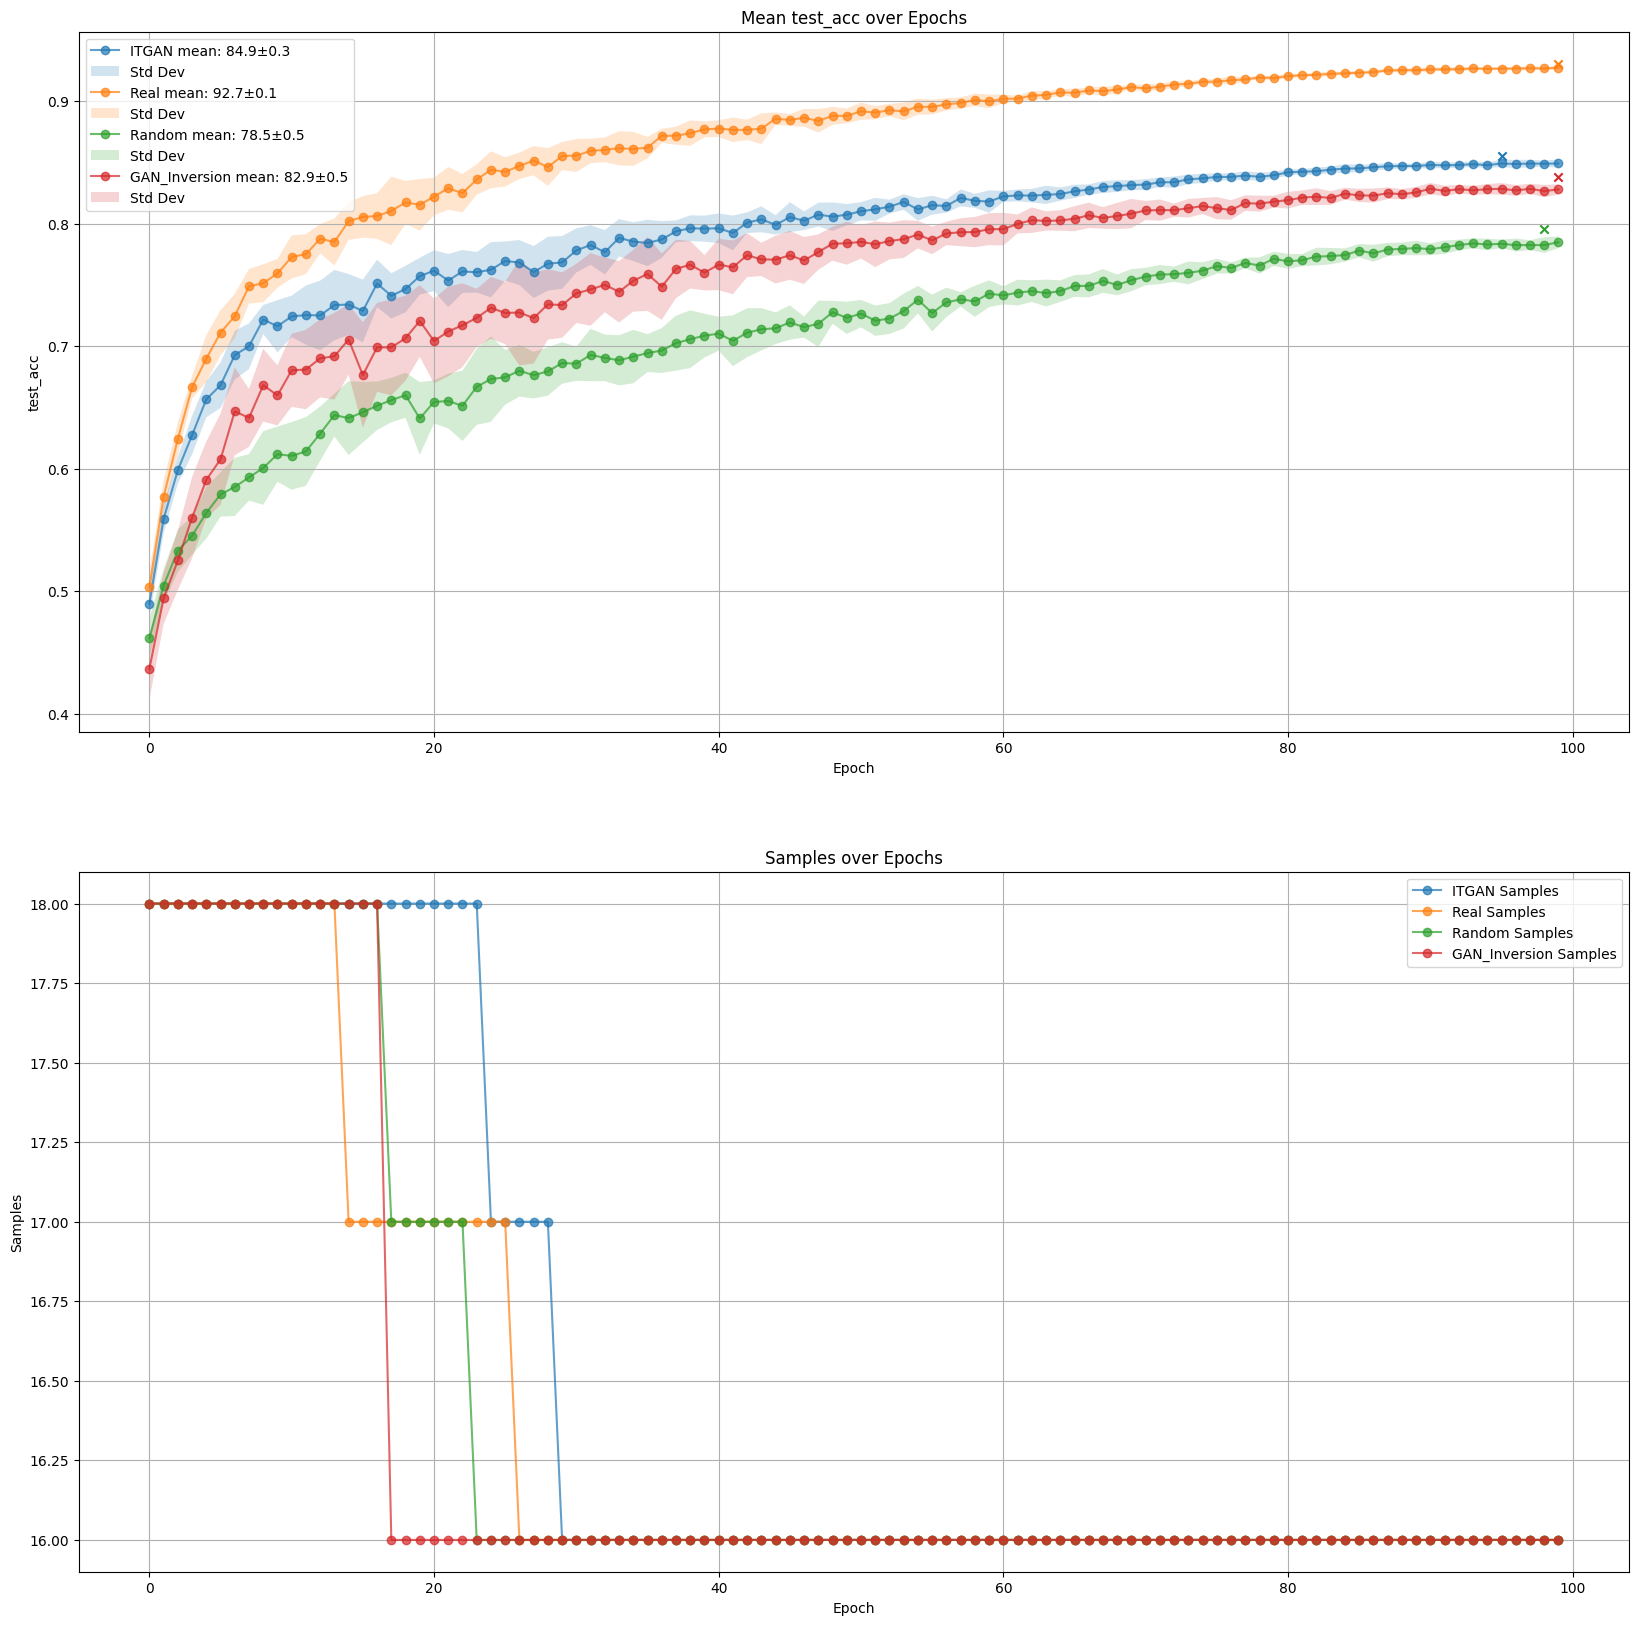

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

results1_2 = train_logger.plot_metric(logger_baseline, 1, 2,3, 4, metric='test_acc', ax=ax[0])
train_logger.plot_samples(logger_baseline, 1, 2,3, 4, metric='test_acc', ax=ax[1])
